**Population of different religious communities in Israel over time**  
* Extract and process the data about population sizes of different religious communities in Israel over time.  
* Show which communities increase their percentage over time, and how their growth rates differ.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I'm using 2 publicly available datasets about Israel population and sizes over different religious communities over time:
https://en.wikipedia.org/wiki/Demographics_of_Israel#Births_and_deaths
https://en.wikipedia.org/wiki/Religion_in_Israel#Relative_sizes_of_the_religious_communities_in_Israel

In [2]:
pop = pd.read_excel('ISR Population.xlsx') # load a table with total population of Israel

In [3]:
pop.head()

,Year,Population (x1000),Live births,Deaths,Natural increase,Crude birth rate,Crude death rate,Rate of natural increase,TFR
0,1950,1 370,43 431,8 700,34 731,34.1,6.8,27.3,NaN
1,1951,1 578,50 542,9 866,40 676,34.3,6.7,27.6,NaN
2,1952,1 630,52 556,11 666,40 890,32.8,7.3,25.5,NaN
3,1953,1 669,52 552,10 916,41 636,31.9,6.6,25.3,NaN
4,1954,1 718,48 951,11 328,37 623,28.9,6.7,22.2,NaN


In [4]:
df = pd.DataFrame(pop[['Year', 'Population (x1000)']]).set_index('Year') # leave only relevant columns

In [5]:
df['Population (x1000)'] = df['Population (x1000)'].str.replace(' ','') # remove spaces from population column
df['Population'] = df['Population (x1000)'].astype(int)*1000 # convert to int

In [6]:
df.drop(df.columns[0], axis = 1, inplace = True) # remove the string population column
df.head()

,Population
Year,
1950,1370000
1951,1578000
1952,1630000
1953,1669000
1954,1718000


In [7]:
rel = pd.read_excel('ISR Religion.xlsx') # load a table with religious breakdown
rel.head()

,Year,Druze,%,Christians,%.1,Muslims,%.2,Jews,%.3,Total
0,1948,...,NaN,...,NaN,...,NaN,758.7,NaN,...
1,1950,15,1.09,36,2.63,116.1,8.47,1203.0,87.80,1370.1
2,1960,23.3,1.08,49.6,2.31,166.3,7.73,1911.3,88.88,2150.4
3,1970,35.9,1.19,75.5,2.50,328.6,10.87,2582.0,85.44,3022.1
4,1980,50.7,1.29,89.9,2.29,498.3,12.71,3282.7,83.71,3921.7


In [8]:
rel.set_index('Year', inplace = True)
print(df.index[-1]) # last year in the main df
print(rel.index[-1]) # last year in religion df

2018
2019


In [9]:
rel.drop([1948,2019], inplace = True) # remove year 1948 without data and year 2019 that has no data in the main dataframe

In [10]:
religions = ['Druze','Christians','Muslims','Jews']
rel.drop(religions + ['Total'], axis = 1, inplace = True) # remove column with ansolue population values

In [11]:
rel.columns = [item + ' %' for item in religions]

In [12]:
rel.head()

,Druze %,Christians %,Muslims %,Jews %
Year,,,,
1950,1.09,2.63,8.47,87.80
1960,1.08,2.31,7.73,88.88
1970,1.19,2.50,10.87,85.44
1980,1.29,2.29,12.71,83.71
1990,1.71,2.38,14.05,81.85


In [13]:
rel = rel / 100 # convert values to percentages
rel.head()

,Druze %,Christians %,Muslims %,Jews %
Year,,,,
1950,0.0109,0.0263,0.0847,0.8780
1960,0.0108,0.0231,0.0773,0.8888
1970,0.0119,0.0250,0.1087,0.8544
1980,0.0129,0.0229,0.1271,0.8371
1990,0.0171,0.0238,0.1405,0.8185


In [14]:
df = df.merge(rel, left_index=True, right_index=True, how = 'left')
df.head()

,Population,Druze %,Christians %,Muslims %,Jews %
Year,,,,,
1950,1370000,0.0109,0.0263,0.0847,0.878
1951,1578000,NaN,NaN,NaN,NaN
1952,1630000,NaN,NaN,NaN,NaN
1953,1669000,NaN,NaN,NaN,NaN
1954,1718000,NaN,NaN,NaN,NaN


In [15]:
df = df.interpolate(method='linear', axis=0) # caluclate missing values of religious communities %

In [16]:
df.head()

,Population,Druze %,Christians %,Muslims %,Jews %
Year,,,,,
1950,1370000,0.01090,0.02630,0.08470,0.87800
1951,1578000,0.01089,0.02598,0.08396,0.87908
1952,1630000,0.01088,0.02566,0.08322,0.88016
1953,1669000,0.01087,0.02534,0.08248,0.88124
1954,1718000,0.01086,0.02502,0.08174,0.88232


In [17]:
for col in religions: # caluclate absolute populations for each religious community
    df[col] = (df[col + ' %'] * df['Population']).astype(int)
df.head()

,Population,Druze %,Christians %,Muslims %,Jews %,Druze,Christians,Muslims,Jews
Year,,,,,,,,,
1950,1370000,0.01090,0.02630,0.08470,0.87800,14933,36031,116039,1202860
1951,1578000,0.01089,0.02598,0.08396,0.87908,17184,40996,132488,1387188
1952,1630000,0.01088,0.02566,0.08322,0.88016,17734,41825,135648,1434660
1953,1669000,0.01087,0.02534,0.08248,0.88124,18142,42292,137659,1470789
1954,1718000,0.01086,0.02502,0.08174,0.88232,18657,42984,140429,1515825


Now, let's calculate **average annual growth rates** of each community.  
I'll use Compound Annual Growth Rate (CAGR) formula from finance: CAGR=(L/F)^(1/N)−1
* F = First value in your series of values.
* L = Last value in your series of values.
* N = N is the number of years between  First and Last value.

In [18]:
original_populations = df[religions].iloc[0]
final_pupulations = df[religions].iloc[-1]
years = len(df)
CAGR = np.power(final_pupulations/original_populations,1/years) - 1

In [28]:
%matplotlib inline 

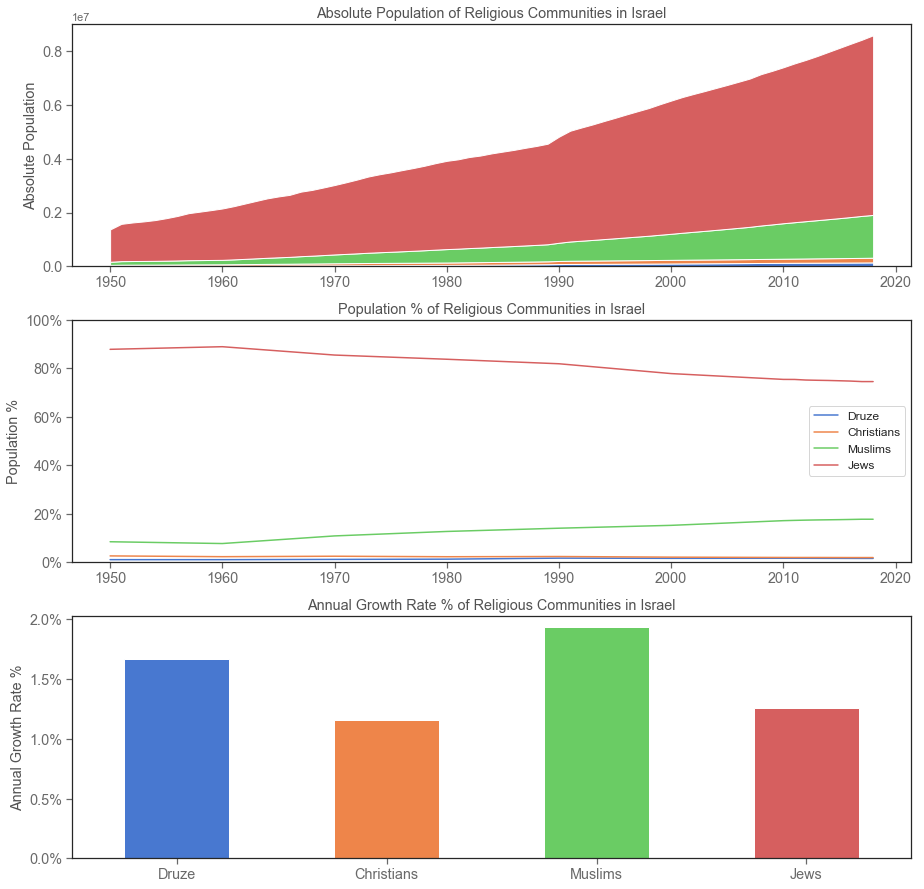

In [37]:
# Set up the matplotlib figure with 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 13))

# creating Absolute Population chart
ax1.set_title('Absolute Population of Religious Communities in Israel', alpha = 0.8, size = 'large') 
ax1.set_ylabel('Absolute Population', alpha = 0.8, size = 'large')
palette = sns.color_palette()
ax1.stackplot(df.index, df[religions].values.T, colors = palette)
ax1.tick_params(colors='dimgrey', labelsize = 'large')  # formating tick labels
sns.set(style="ticks", palette = 'muted')

# creating Population % chart
ax2.plot(df[df.columns[1:5]]); # plot % of every religion
ax2.set_ylabel('Population %', alpha = 0.8, size = 'large');
ax2.set_title('Population % of Religious Communities in Israel', alpha = 0.8, size = 'large') 
ax2.legend(religions, fontsize = 'medium') 
ax2.tick_params(colors='dimgrey', labelsize = 'large')  # formating tick labels
ax2.set(ylim=(0,1))
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()]) # format y axis as percentages
sns.set(style="ticks", palette = 'muted')

# creating Annual Growth Rate chart
CAGR.plot(kind = 'bar', color = palette);
ax3.set_yticklabels(['{:,.1%}'.format(x) for x in ax3.get_yticks()]); # format y axis as percentages
plt.tight_layout() 
ax3.tick_params(colors='dimgrey', labelsize = 'large');  # formating tick labels
ax3.set_ylabel('Annual Growth Rate %', alpha = 0.8, size = 'large');
ax3.set_title('Annual Growth Rate % of Religious Communities in Israel', alpha = 0.8, size = 'large');
for item in ax3.xaxis.get_ticklabels():                 # rotate all tick labels horizontally
    item.set_rotation(0)  

We can see that all populations exhibit absolute growth, but the percentages of Jewish population is decreasing over time, while Muslim population is increasing. Relative sizes of Druze and Christian communities are mostly stable over time.  

We can see that Muslim community has the highest growth rate, followed by Druze community, while Jews and Christians have significantly lower growth rates.